In [1]:

import csv
import pickle
import os
import glob
import json
import seaborn as sns
import tensorflow as tf

import numpy as np
import pandas as pd

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from datetime import datetime, timedelta, date
from tensorflow.keras.utils import to_categorical

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
file_names = glob.glob('results/*/short_results.csv')
file_names

['results/en_dense/short_results.csv',
 'results/en_svm/short_results.csv',
 'results/pl_lstm/short_results.csv',
 'results/en_conv/short_results.csv',
 'results/en_lstm/short_results.csv',
 'results/pl_svm/short_results.csv',
 'results/pl_dense/short_results.csv']

In [4]:
order = [3, 4, 1, 0, 2, 5, 6]
file_names = [file_names[i] for i in order]
file_names

['results/en_conv/short_results.csv',
 'results/en_lstm/short_results.csv',
 'results/en_svm/short_results.csv',
 'results/en_dense/short_results.csv',
 'results/pl_lstm/short_results.csv',
 'results/pl_svm/short_results.csv',
 'results/pl_dense/short_results.csv']

In [5]:
summary_data = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    summary_data.append({'acc': np.mean(df['Accuracy']),
                         'f1s0': np.mean(df['F1 score (0)']),
                         'f1s1': np.mean(df['F1 score (1)'])})
summary_df = pd.DataFrame(summary_data)
summary_df

,acc,f1s0,f1s1
0,0.892624,0.847893,0.917025
1,0.916203,0.882263,0.934954
2,0.902842,0.862614,0.924847
3,0.917836,0.884488,0.936242
4,0.981814,0.989327,0.938575
5,0.925747,0.955175,0.783831
6,0.931301,0.960522,0.735201


In [6]:
labels = ['Conv. NN', 'LSTM NN', 'SVM', 'Dense NN']

In [7]:
def models_comparison_bars(df, labels, title, save_file=None):
    
    def set_bar_labels(axis, bars):
        for bar in bars:
            h = bar.get_height()
            w = bar.get_width()
            x_c = bar.get_x()
            axis.annotate('{}'.format(round(h, 2)), xy=(x_c + w/2, h), xytext=(0, -20),
                          textcoords='offset points', size=15, ha='center', va='bottom')
    
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    
    x = range(len(labels))
    acc = df['acc'].values
    f1s0 = df['f1s0'].values
    f1s1 = df['f1s1'].values
    
    max_acc_id = np.argmax(acc)
    max_f1s0_id = np.argmax(f1s0)
    max_f1s1_id = np.argmax(f1s1)
    
    bars0 = axs[0].bar(x, acc, color='r')
    axs[0].set_xlabel('Model')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Accuracy')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    axs[0].set_ylim([0, 1])
    set_bar_labels(axs[0], bars0)
    axs[0].patches[max_acc_id].set_facecolor('g')
    
    bars1 = axs[1].bar(x, f1s0, color='b')
    axs[1].set_xlabel('Model')
    axs[1].set_ylabel('F1 score (no hate)')
    axs[1].set_title('F1 score (no hate)')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    axs[1].set_ylim([0, 1])
    set_bar_labels(axs[1], bars1)
    axs[1].patches[max_f1s0_id].set_facecolor('g')
    
    bars2 = axs[2].bar(x, f1s1, color='m')
    axs[2].set_xlabel('Model')
    axs[2].set_ylabel('F1 score (hate speech)')
    axs[2].set_title('F1 score (hate speech)')
    axs[2].set_xticks(x)
    axs[2].set_xticklabels(labels)
    axs[2].set_ylim([0, 1])
    set_bar_labels(axs[2], bars2)
    axs[2].patches[max_f1s1_id].set_facecolor('g')
    
    fig.suptitle(title)
    
    if save_file:
        plt.savefig(save_file)
    plt.show()

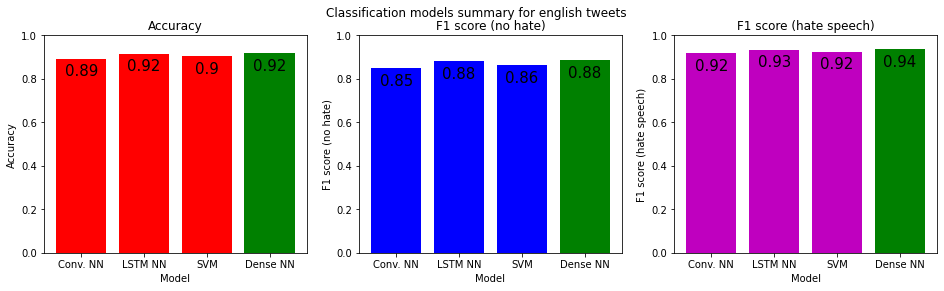

In [8]:
models_comparison_bars(summary_df.iloc[0:4], labels=labels,
                       title='Classification models summary for english tweets',
                       save_file='results/summary_en.png')

num:  55132


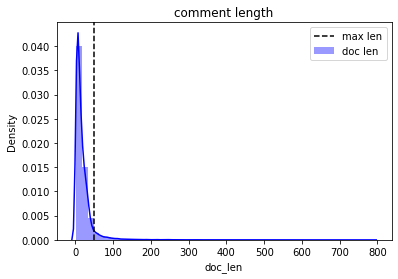

In [9]:
data = pd.read_csv('hsd/Reddit/all_data.csv', sep=',', header=0, index_col=0)
data = data.fillna('_NA_')

print("num: ", data.shape[0])

label_names = ['class']
y = list(map(lambda number: 1 if number[0] == 2 else 0, data[label_names].values.tolist()))
y = to_categorical(y)

#visualize word distribution
data['doc_len'] = data['lemmatized_text'].apply( lambda words: len(str(words).split()) )
max_seq_len = 50
sns.distplot(data['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()

In [10]:
MAX_NB_WORDS = 100000

raw_docs = data['lemmatized_text'].apply(lambda words: str(words)).tolist()
num_classes = len(label_names)

print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(raw_docs)  #leaky
word_seq = tokenizer.texts_to_sequences(raw_docs)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
word_seq = sequence.pad_sequences(word_seq, maxlen=max_seq_len)

tokenizing input data...
dictionary size:  41117


In [30]:
reasult.to_csv('results/en_dense/assigned_labels.csv')

In [34]:
file_names_en = glob.glob('results/en*/assigned_labels.csv')
order = [2, 0, 1, 3]
file_names_en = [file_names_en[i] for i in order]
file_names_en

['results/en_conv/assigned_labels.csv',
 'results/en_dense/assigned_labels.csv',
 'results/en_svm/assigned_labels.csv',
 'results/en_lstm/assigned_labels.csv']

In [38]:
def get_assignments_series(file_names):
    series = []
    for file_name in file_names:
        with open(file_name, 'r') as f:
            reader = csv.reader(f)
            series.append([row[1] for row in list(reader)[1:]])
    
    return series

In [39]:
def class_distribution_hist(series, labels, cls, x_label, y_label, title, file_name=None):
    pd.Series(series).hist()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    tick_marks = np.arange(len(cls))
    plt.xticks(tick_marks, cls)
    plt.legend(labels=labels, loc='best')
    
    if file_name:
        plt.savefig(file_name)
    plt.show()

In [40]:
series_en = get_assignments_series(file_names_en)

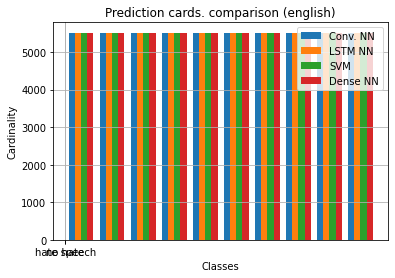

In [42]:
class_distribution_hist(series_en, labels=labels, cls=['no hate', 'hate speech'], x_label='Classes', y_label='Cardinality',
                        title='Prediction cards. comparison (english)', file_name='results/pred_cards_comp_en.png')

In [43]:
series_en


  '756',
  '757',
  '758',
  '759',
  '760',
  '761',
  '762',
  '763',
  '764',
  '765',
  '766',
  '767',
  '768',
  '769',
  '770',
  '771',
  '772',
  '773',
  '774',
  '775',
  '776',
  '777',
  '778',
  '779',
  '780',
  '781',
  '782',
  '783',
  '784',
  '785',
  '786',
  '787',
  '788',
  '789',
  '790',
  '791',
  '792',
  '793',
  '794',
  '795',
  '796',
  '797',
  '798',
  '799',
  '800',
  '801',
  '802',
  '803',
  '804',
  '805',
  '806',
  '807',
  '808',
  '809',
  '810',
  '811',
  '812',
  '813',
  '814',
  '815',
  '816',
  '817',
  '818',
  '819',
  '820',
  '821',
  '822',
  '823',
  '824',
  '825',
  '826',
  '827',
  '828',
  '829',
  '830',
  '831',
  '832',
  '833',
  '834',
  '835',
  '836',
  '837',
  '838',
  '839',
  '840',
  '841',
  '842',
  '843',
  '844',
  '845',
  '846',
  '847',
  '848',
  '849',
  '850',
  '851',
  '852',
  '853',
  '854',
  '855',
  '856',
  '857',
  '858',
  '859',
  '860',
  '861',
  '862',
  '863',
  '864',
  '865',
  '866',
